# Supervised Machine Learning using deeplearning
 Supervised machine learning is the machine learning technique in which the neural network learns to make predictions or classify data based on the labeled datasets. Here we input both input features along with the target variables. the neural network learns to make predictions based on the cost or error that comes from the difference between the predicted and the actual target, this process is known as backpropagation.  Deep learning algorithms like Convolutional neural networks, Recurrent neural networks are used for many supervised tasks like image classifications and recognization, sentiment analysis, language translations, etc.

In [1]:
#  Import Libraries

In [2]:
import torch as th
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
# Load and Prepare the Data

In [4]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
# all elements of target should be between 0 and 1
y = (iris.target == 0).astype(int)  # Binary classification: Setosa vs. not Setosa

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert data to PyTorch tensors
X_train_tensor = th.tensor(X_train, dtype=th.float32)
y_train_tensor = th.tensor(y_train, dtype=th.float32).unsqueeze(1)
X_test_tensor = th.tensor(X_test, dtype=th.float32)
y_test_tensor = th.tensor(y_test, dtype=th.float32).unsqueeze(1)

# Create DataLoader for training
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [5]:
# Define the Neural Network Model

In [6]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = th.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

model = SimpleNN()
print(model)

SimpleNN(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)


In [7]:
# Define Loss Function and Optimizer

In [8]:
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [9]:
# Train the Model

In [10]:
loss_values = []  # List to store loss values for each epoch

num_epochs = 50
for epoch in range(num_epochs):
    epoch_loss = 0
    for inputs, labels in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        yp = model(inputs)
        loss = criterion(yp, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Accumulate loss for this batch
        epoch_loss += loss.item()
    
    # Calculate average loss for this epoch and store it
    avg_loss = epoch_loss / len(train_loader)
    loss_values.append(avg_loss)
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}')

Epoch [10/50], Loss: 0.0139
Epoch [20/50], Loss: 0.0043
Epoch [30/50], Loss: 0.0020
Epoch [40/50], Loss: 0.0013
Epoch [50/50], Loss: 0.0009


In [11]:
# Evaluate the Model

In [12]:
model.eval()  # Set the model to evaluation mode
with th.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_class = (y_pred > 0.5).float()
    accuracy = (y_pred_class.eq(y_test_tensor).sum() / float(y_test_tensor.shape[0])).item()
    print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


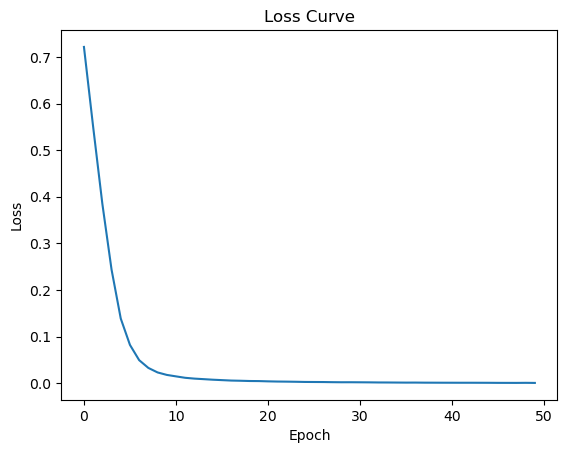

In [73]:
# Plot the loss curve
plt.plot(range(num_epochs), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

# Unsupervised Machine Learning using deeplearning
Unsupervised machine learning is the machine learning technique in which the neural network learns to discover the patterns or to cluster the dataset based on unlabeled datasets. Here there are no target variables. while the machine has to self-determined the hidden patterns or relationships within the datasets. Deep learning algorithms like autoencoders and generative models are used for unsupervised tasks like clustering, dimensionality reduction, and anomaly detection.

In [13]:
# Import Required Libraries

In [14]:
import torch as th
import torch.nn as nn
import torch.optim as op
import torchvision.datasets as dsets
import torchvision.transforms as tf

In [15]:
import matplotlib.pyplot as plt
import numpy as np

In [77]:
# Load the MNIST Dataset

In [16]:
# Load training and test datasets

train_dset=dsets.MNIST(root="./data",train=True,transform=tf.ToTensor(),download=True)

test_dset=dsets.MNIST(root="./data",train=False,transform=tf.ToTensor())

In [17]:
train_loader=th.utils.data.DataLoader(dataset=train_dset,batch_size=64,shuffle=True)
test_loader=th.utils.data.DataLoader(dataset=test_dset,batch_size=64,shuffle=False)

In [18]:
# Define the Autoencoder Model:

In [19]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True),
            nn.Linear(64, 12),
            nn.ReLU(True),
            nn.Linear(12, 3)  # The bottleneck layer
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True),
            nn.Linear(128, 28 * 28),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
model=Autoencoder()
print(model)

Autoencoder(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=64, out_features=12, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=12, out_features=3, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=3, out_features=12, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=12, out_features=64, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=64, out_features=128, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=128, out_features=784, bias=True)
    (7): Tanh()
  )
)


In [20]:
# Instantiate the Model, Loss Function, and Optimizer:

In [21]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [22]:
# Train the Autoencoder:

In [23]:
num_epoch=10
for k in range(num_epoch):
    for data_x in train_loader:
        x,_=data_x
        X=x.view(x.size(0),-1)# Flatten the image
        yp=model(X)
        loss_fn=criterion(yp,X)
        optimizer.zero_grad()
        loss_fn.backward()
        optimizer.step()
        
    print(f"Epoch[{k+1}/{num_epoch}],Loss:{loss_fn.item():.4f}")

Epoch[1/10],Loss:0.1120
Epoch[2/10],Loss:0.1125
Epoch[3/10],Loss:0.1239
Epoch[4/10],Loss:0.1230
Epoch[5/10],Loss:0.1124
Epoch[6/10],Loss:0.1069
Epoch[7/10],Loss:0.0990
Epoch[8/10],Loss:0.1162
Epoch[9/10],Loss:0.1128
Epoch[10/10],Loss:0.1214


In [86]:
# Visualize the Results

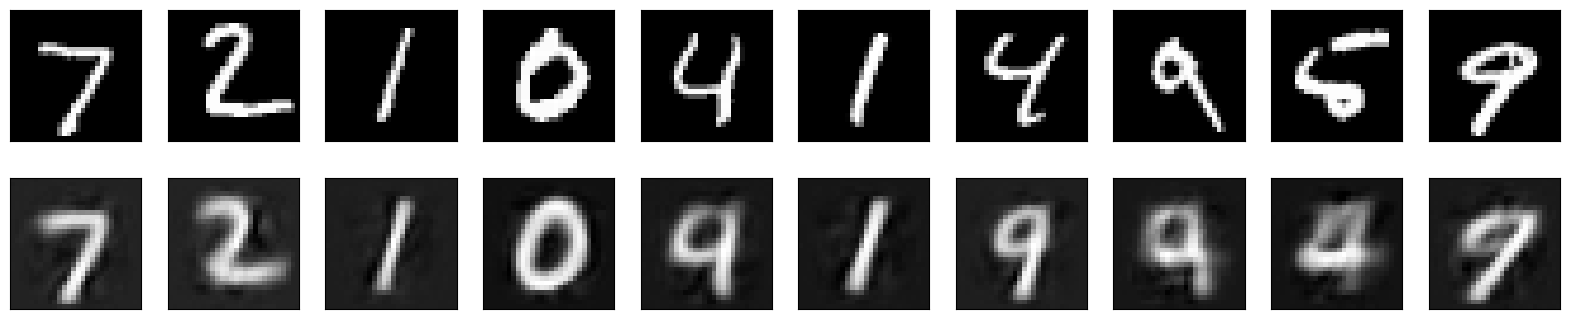

In [88]:
def visulaization(model,data_loader):
    with th.no_grad():
        data_iter=iter(data_loader)
        x,_=next(data_iter)
        X=x.view(x.size(0),-1)
        YP=model(X)
        YP=YP.view(YP.size(0),1,28,28)
        X=X.view(X.size(0),1,28,28)
        fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20, 4))

        
        # Plot original images
        for i in range(10):
            ax = axes[0, i]
            ax.imshow(X[i].squeeze().numpy(), cmap='gray')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

        # Plot reconstructed images
        for i in range(10):
            ax = axes[1, i]
            ax.imshow(YP[i].squeeze().numpy(), cmap='gray')
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

visulaization(model, test_loader)